<a href="https://colab.research.google.com/github/Nagmashaik123/Section203-Group06/blob/main/Vacc_Dose_TM_Bi-gram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Importing the processed vaccination file
import pandas as pd
df=pd.read_csv(r"ProcessedCovidVaccineReact.csv")
df

,TweetDate,TweetText,CleanedTweet,TweetAuthor,TweetLocation,AllHashtags,Country
0,2021-04-02 23:59:56,RT @ichaydon: A year ago I tried the Moderna v...,rt ichaydon year ago tried moderna vaccine see...,realbafomet,United Arab Emirates,['COVIDvaccine'],United Arab Emirates
1,2021-04-02 23:59:53,RT @hotvickkrishna: Why we need Two Doses of m...,rt hotvickkrishna need two doses mrna vaccine ...,EVANtiel,Unknown,"['vaccines', 'COVID19', 'Pfizer', 'moderna', '...",Unknown
2,2021-04-02 23:59:46,RT @StephMillerShow: Stick it in! Moderna Mama...,rt stephmillershow stick moderna mama house ya...,anessia40,Unknown,"['vaccinated', 'VaccinesWork', 'VaccinesSaveLi...",Unknown
3,2021-04-02 23:59:43,RT @hotvickkrishna: Why we need Two Doses of m...,rt hotvickkrishna need two doses mrna vaccine ...,tammeeh,Kota Petir,"['vaccines', 'COVID19', 'Pfizer', 'moderna', '...",Indonesia
4,2021-04-02 23:59:43,RT @ichaydon: A year ago I tried the Moderna v...,rt ichaydon year ago tried moderna vaccine see...,shipshape555,San Diego,['COVIDvaccine'],United States
...,...,...,...,...,...,...,...
206245,2021-03-10 22:35:54,I blasted this in the car as an Army nurse gav...,blasted car army nurse gave covid vaccine toda...,MatthewDWhite2,New Orleans,"['vaccinated', 'vaccine', 'rona', 'Mississippi...",United States
206246,2021-03-10 22:35:48,2nd #Pfizer shot!! I’m vaccinated! Thank you @...,pfizer shot im vaccinated thank vanyharbor gre...,NYMetroVets,Bronx,"['Pfizer', 'Veterans', 'CovidVaccine']",United States
206247,2021-03-10 22:35:09,@Sarahluvshkey77 Tomorrow is two weeks since m...,tomorrow two weeks since second shot appointme...,G8rgrrlCheryl,Western Washington,['vaccinated'],United States
206248,2021-03-10 22:35:00,"#COVID19 vaccines are hard to come by, but the...",vaccines hard come theres new way find shot ch...,medicaldaily,New York,"['COVID19', 'COVID19vaccine', 'vaccineregistra...",United States


In [17]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package brown to /root/nltk_data...
       |   Package brown is already up-to-date!
       | Downloading package brown_tei to /root/nltk_data...
       |   Package brown_tei is already up-to-date!
       | Downloading package cess_cat to /root/nltk_data...
       |   Package cess_cat is already up-to-date!
       | Down

True

In [19]:
# Importing packages
import pandas as pd
from gensim.models import Phrases
from gensim import corpora, models
from nltk.tokenize import word_tokenize 
tokens=[]
bigram = Phrases()

# Iterating through cleaned tweets
for a in df["CleanedTweet"]:
  try:
    if pd.isnull(a) or float(a):
      tokens.append("")
  except ValueError:
# Converting into tokens   
      tokens.append(word_tokenize(a))

# Calling bi-grams API to fetch the bi-grams
bigram_data = models.Phrases(tokens, min_count=30)
bigrams_mod_val = models.phrases.Phraser(bigram_data)




In [21]:

import operator
dictionary={}
count=0
bigrams=[]
# Creating the dictionary as key value pairs for each bi and its corresponding frequency count
for id in range(len(tokens)):
    for token in bigrams_mod_val[tokens[id]]:
        if '_' in token:
          bigrams.append(token)
          tokens[id].append(token)
# Setting key value dictionary           
for keyVal in bigrams:
  if keyVal in dictionary:
    dictionary[keyVal]+=1
  else:
    dictionary[keyVal]=1

# Returns the final list of bigram Map.    
data= sorted(dictionary.items(),key=operator.itemgetter(1),reverse=True)


In [22]:
data[:20000]

[('anniversary_im', 8912),
 ('see_safe', 8908),
 ('ichaydon_year', 8898),
 ('ago_tried', 8898),
 ('two_doses', 7064),
 ('mrna_vaccine', 7006),
 ('vaccines_pfizer', 6820),
 ('moderna_vaccinessavelives', 6812),
 ('vaccinated_httpstco', 6796),
 ('hotvickkrishna_need', 6782),
 ('life_saving', 6752),
 ('trump_would', 6578),
 ('davidmweissman_never', 6570),
 ('would_imagine', 6570),
 ('leaving_maga', 6570),
 ('ending_support', 6570),
 ('got_first', 5848),
 ('first_dose', 5330),
 ('side_effects', 5260),
 ('fully_vaccinated', 4902),
 ('donut_krispykreme', 3892),
 ('fucking_year', 3860),
 ('maryltrump_long', 3856),
 ('emas_safety', 3742),
 ('committee_prac', 3730),
 ('slots_ca', 3592),
 ('second_dose', 3466),
 ('outweigh_risks', 2950),
 ('astrazeneca_still', 2834),
 ('concludes_benefits', 2816),
 ('received_first', 2502),
 ('cant_wait', 2470),
 ('blood_clots', 2372),
 ('cvs_locations', 2366),
 ('doses_uk', 2274),
 ('country_doses', 1882),
 ('reminder_eu', 1876),
 ('richardgcorbett_marr', 1874),

In [23]:
labels = ['Bigram_Words', 'Frequency']
df = pd.DataFrame.from_records(data[:20000], columns=labels)
df

,Bigram_Words,Frequency
0,anniversary_im,8912
1,see_safe,8908
2,ichaydon_year,8898
3,ago_tried,8898
4,two_doses,7064
...,...,...
3515,introduced_paid,2
3516,leave_looking,2
3517,hilarious_explainer,2
3518,concerns_relating,2


In [24]:
# Importing libraries for visual word cloud map

import numpy as np
from PIL import Image
import pandas as pd
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt



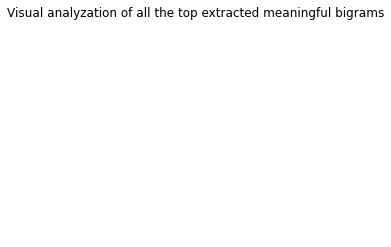

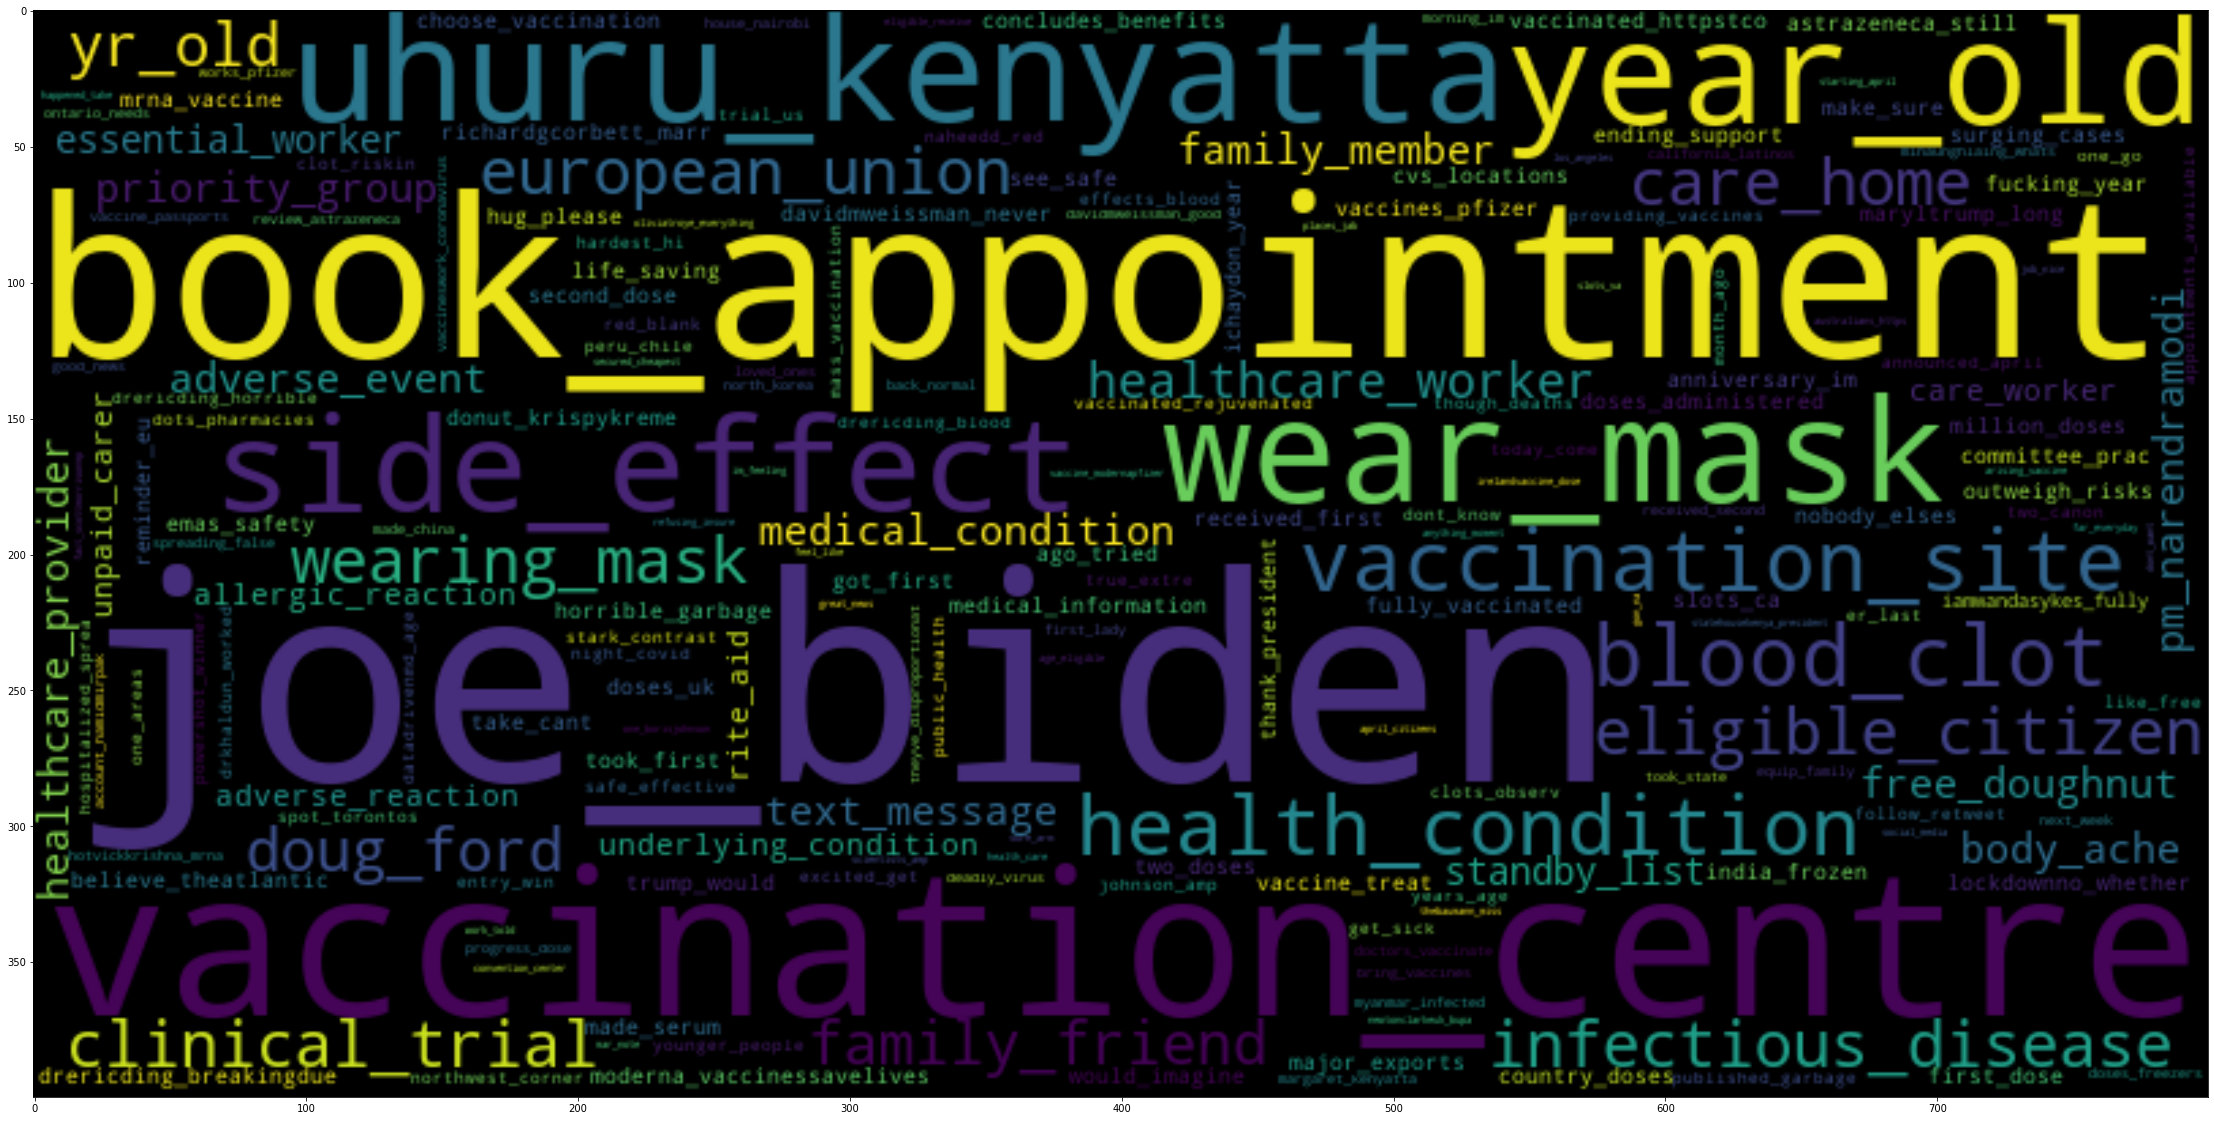

In [25]:
# Python program to generate WordCloud for column Bigrams

textData = " ".join(review for review in df.Bigram_Words.astype(str))

# removing stopwords that we want to exclude
stopwords = set(STOPWORDS)
stopwords.update(["hotvickkrishna_need","leaving_maga","cant_wait"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black", width=800, height=400).generate(textData)

# Display the generated image matplotlib way:
plt.axis("off")
plt.title("Visual analyzation of all the top extracted meaningful bigrams")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [26]:
# Analysing the bi-grams and manually reading the bi-grams and categorizing them as First Dose , Second Dose and yet to be vaccinated
First_Dose =[ 'first_dose', 'got_first','receives_first','took_first','due_second','single_dose','wearamask_firstdosedone'] # First Dose declaring manually for analysis
Second_Dose =['received_second','second_dose','doses_administered','administering_doses','two_doses','fully_vaccinated','vaccinated_rejuvenated'] # Second Dose declaring manually for analysis
Appointments_Scheduled = ['schedule_appointment','appointment_saturday','appointments_newly','appointment_online'] # Scheduled appointments declaring manually for analysis

First_Dose_Count   = df.loc[df['Bigram_Words'].isin(First_Dose), 'Frequency'].sum()
Second_Dose_Count  = df.loc[df['Bigram_Words'].isin(Second_Dose), 'Frequency'].sum()
Appointments_Count = df.loc[df['Bigram_Words'].isin(Appointments_Scheduled), 'Frequency'].sum()

# initialize list of lists
Vaccination_Doses = [['First Dose', First_Dose_Count], ['Second Dose', Second_Dose_Count], ['Appointments Scheduled', Appointments_Count]]
  
# Create the pandas DataFrame
df = pd.DataFrame(Vaccination_Doses, columns = ['Vaccination_Doses', 'Population_Count'])
populationCount= df['Population_Count'].tolist()  
vaccinationDoses= df['Vaccination_Doses'].tolist()
# print dataframe.
df


,Vaccination_Doses,Population_Count
0,First Dose,13802
1,Second Dose,19504
2,Appointments Scheduled,1190


Text(0, 0.5, 'Vaccination Dosage Count')

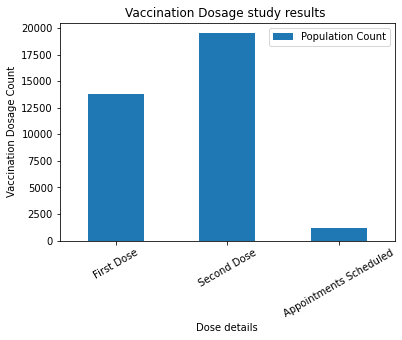

In [27]:
from matplotlib import pyplot as plt
# Create a sample dataframe with an text index


plotdata = pd.DataFrame(
    {"Population Count": populationCount}, 
    index= vaccinationDoses)
# Plot a bar chart
plotdata.plot(kind="bar")

plotdata['Population Count'].plot(kind="bar", title="")
# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Vaccination Dosage study results ")
plt.xlabel("Dose details")
plt.ylabel("Vaccination Dosage Count")

